# Importing the Required Libraries

In [1]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=2e7bd8331f6e2a5c11894d8c0091c01e207a27f03955618c9dfd939d9554d573
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [2]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.7 MB/s eta 0:00:00


In [3]:
pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.3 MB/s eta 0:00:00


In [4]:
!pip install bert-extractive-summarizer

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d gowrishankarp/newspaper-text-summarization-cnn-dailymail

 96% 481M/503M [00:02<00:00, 219MB/s]
100% 503M/503M [00:03<00:00, 175MB/s]


In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from rouge_score import rouge_scorer
from transformers import T5Tokenizer, T5ForConditionalGeneration
import matplotlib.pyplot as plt
from summarizer import Summarizer,TransformerSummarizer
rougeT = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Extracting Files

In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/newspaper-text-summarization-cnn-dailymail.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

# Basic information about Dataset

In [11]:
train_data = pd.read_csv("/content/cnn_dailymail/train.csv")
val_data = pd.read_csv("/content/cnn_dailymail/validation.csv")
test_data = pd.read_csv("/content/cnn_dailymail/test.csv")

In [12]:
train_data.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [13]:
train_data = train_data[['article','highlights']]
val_data = val_data[['article','highlights']]
test_data = test_data[['article','highlights']]


In [14]:
train_data.shape

(287113, 2)

In [15]:
val_data.shape

(13368, 2)

In [16]:
test_data.shape

(11490, 2)

In [17]:
#Considering only 4K Samples
training_data = train_data.sample(n = 4000)

In [18]:
model_t5 = "t5-small"
tokenizerT5 = T5Tokenizer.from_pretrained(model_t5)
modelT5 = T5ForConditionalGeneration.from_pretrained(model_t5)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [19]:
def summarize_Bert(text):
    bert_model = Summarizer()
    bert_summary = ''.join(bert_model(text, min_length=100))
    return bert_summary

In [ ]:
cnt = 0
for i in train_data['article']:
  if cnt < 5:
    print(i)
  cnt = cnt + 1


By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a conference for newly ordained b

In [ ]:
summary_bert = []
for reference in training_data['article']:
  candidate_summary_bert = summarize_Bert(reference)
  summary_bert.append(candidate_summary_bert)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KeyboardInterrupt: ignored

In [ ]:
for i in range(training_data.shape[0]):
  scoresBert = rougeT.score(summary_bert[i],training_data['highlights'][i])

NameError: ignored

In [32]:
def summarize_T5(text):
    inputs = tokenizerT5.encode(text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = modelT5.generate(inputs, max_length=150, num_beams=4, early_stopping=True)
    return tokenizerT5.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
summary_T5 = []
for reference in training_data['article']:
  candidate_summary_T5 = summarize_T5(reference)
  summary_T5.append(candidate_summary_T5)

In [ ]:
for i in range(training_data.shape[0]):
  scoresT5 = rougeT.score(summary_T5[i],training_data['highlights'][i])

In [ ]:
#Validating and hyper parameter tuning

In [22]:
val_data = val_data.sample(n=5 , ignore_index=True , replace = True)
val_data.shape

(5, 2)

In [23]:
summary_bert_val = []
for reference in val_data['article']:
  candidate_summary_bert = summarize_Bert(reference)
  summary_bert_val.append(candidate_summary_bert)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [24]:
for i in range(val_data.shape[0]):
  scoresBertval = rougeT.score(summary_bert_val[i],val_data['highlights'][i])
scoresBertval

{'rouge1': Score(precision=0.65, recall=0.07926829268292683, fmeasure=0.14130434782608697),
 'rouge2': Score(precision=0.2631578947368421, recall=0.03067484662576687, fmeasure=0.05494505494505495),
 'rougeL': Score(precision=0.4, recall=0.04878048780487805, fmeasure=0.08695652173913045)}

In [34]:
summary_T5_val = []
for reference in val_data['article']:
  candidate_summary_T5 = summarize_T5(reference)
  summary_T5_val.append(candidate_summary_T5)

In [27]:
for i in range(val_data.shape[0]):
  scoresT5val = rougeT.score(summary_T5_val[i],val_data['highlights'][i])
scoresT5val

{'rouge1': Score(precision=0.3, recall=0.13333333333333333, fmeasure=0.18461538461538463),
 'rouge2': Score(precision=0.05263157894736842, recall=0.022727272727272728, fmeasure=0.031746031746031744),
 'rougeL': Score(precision=0.3, recall=0.13333333333333333, fmeasure=0.18461538461538463)}

{'rouge1': Score(precision=0.3, recall=0.13953488372093023, fmeasure=0.1904761904761905),
 'rouge2': Score(precision=0.05263157894736842, recall=0.023809523809523808, fmeasure=0.03278688524590164),
 'rougeL': Score(precision=0.3, recall=0.13953488372093023, fmeasure=0.1904761904761905)}

{'rouge1': Score(precision=0.3, recall=0.13953488372093023, fmeasure=0.1904761904761905),
 'rouge2': Score(precision=0.10526315789473684, recall=0.047619047619047616, fmeasure=0.06557377049180328),
 'rougeL': Score(precision=0.25, recall=0.11627906976744186, fmeasure=0.15873015873015872)}

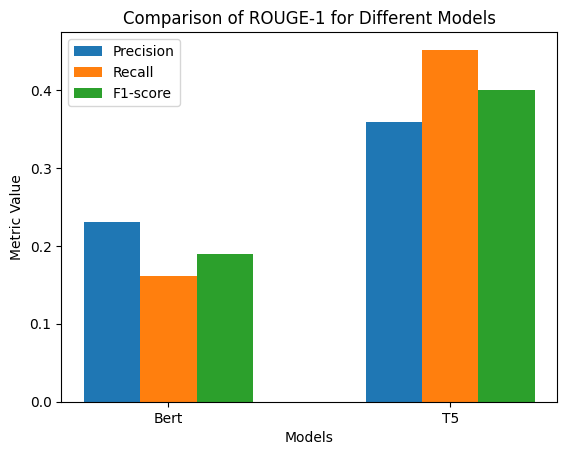

In [ ]:
# Model names
models = ['Bert', 'T5']

# Values for each metric
precision_values = [scoresBert['rouge1'].precision, scoresT5['rouge1'].precision]
recall_values = [scoresBert['rouge1'].recall, scoresT5['rouge1'].recall]
fmeasure_values = [scoresBert['rouge1'].fmeasure, scoresT5['rouge1'].fmeasure]

# Bar width
bar_width = 0.2

# X-axis positions for the bars
x_positions = np.arange(len(models))

# Create bar graphs
plt.bar(x_positions - bar_width, precision_values, width=bar_width, label='Precision')
plt.bar(x_positions, recall_values, width=bar_width, label='Recall')
plt.bar(x_positions + bar_width, fmeasure_values, width=bar_width, label='F1-score')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.title('Comparison of ROUGE-1 for Different Models')
plt.xticks(x_positions, models)
plt.legend()

# Show the graph
plt.show()

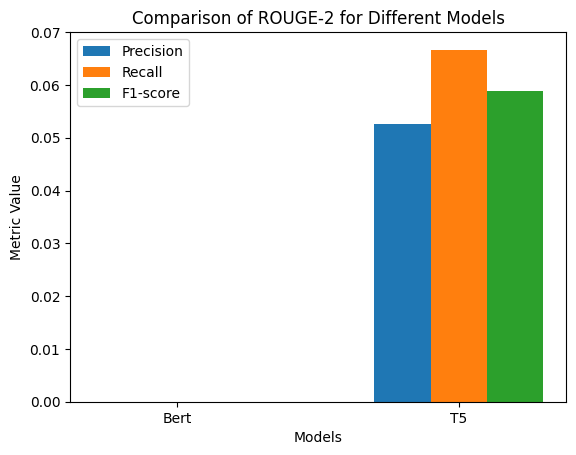

In [ ]:
# Model names
models = ['Bert', 'T5']

# Values for each metric
precision_values = [scoresBert['rouge2'].precision, scoresT5['rouge2'].precision]
recall_values = [scoresBert['rouge2'].recall, scoresT5['rouge2'].recall]
fmeasure_values = [scoresBert['rouge2'].fmeasure, scoresT5['rouge2'].fmeasure]

# Bar width
bar_width = 0.2

# X-axis positions for the bars
x_positions = np.arange(len(models))

# Create bar graphs
plt.bar(x_positions - bar_width, precision_values, width=bar_width, label='Precision')
plt.bar(x_positions, recall_values, width=bar_width, label='Recall')
plt.bar(x_positions + bar_width, fmeasure_values, width=bar_width, label='F1-score')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.title('Comparison of ROUGE-2 for Different Models')
plt.xticks(x_positions, models)
plt.legend()

# Show the graph
plt.show()

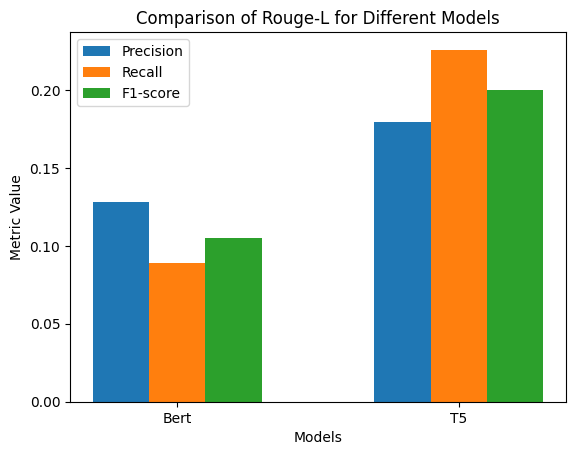